## LINK DATASET LINK:
https://drive.google.com/drive/folders/1g8PwHlRidNhUQeUlP_N73g0jUyS7yVb4?usp=drive_link

**Important notes!**

Data telah siap digunakan untuk modeling, tidak perlu melakukan soal A

### *Google Colab link:*
https://colab.research.google.com/drive/1xmZq4EYP26lYE6aCGNGCZfHVCI5qeXZ8?usp=sharing



## Libraries

In [2]:
import pandas as pd
from glob import glob
import os
from shutil import copyfile
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
from numpy.random import permutation
import matplotlib.pyplot as plt

from torchvision import transforms
from torchvision.datasets import ImageFolder # untuk baca folder image
from torch.utils.data import DataLoader
from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import pickle
%matplotlib inline


In [3]:
is_cuda = torch.cuda.is_available()
is_cuda

True

In [4]:
from google.colab import drive # saat kita load data, ada proses transform
drive.mount('/content/drive')

Mounted at /content/drive


# **Soal A**
 Lakukan eksplorasi terhadap data tersebut dengan melihat histogram warnanya
dan lakukan proses augmentasi data jika diperlukan. Dan kemudian lakukan resize resolusi
gambar menjadi 224 x 224. Pisahkan dataset menjadi 80% training set, 10% validation set dan
10% test set.

## Pisahkan dataset menjadi 80% training set, 10% validation set dan 10% test set.

In [ ]:
import os
import random
import shutil

# Definisikan jalur folder dataset
dataset_folder = '/content/drive/MyDrive/UTSDeepLearning/Dataset2B/betel_nut'

# Definisikan persentase pembagian data
train_ratio, val_ratio, test_ratio = 0.8, 0.1, 0.1

# Ambil semua nama file dalam folder dataset
all_files = os.listdir(dataset_folder)

# Hitung jumlah file untuk setiap bagian
num_total_files = len(all_files)
num_train_files = int(num_total_files * train_ratio)
num_val_files = int(num_total_files * val_ratio)
num_test_files = num_total_files - num_train_files - num_val_files

# Pisahkan file ke dalam setiap bagian
train_files, val_files, test_files = (
    all_files[:num_train_files],
    all_files[num_train_files:num_train_files + num_val_files],
    all_files[num_train_files + num_val_files:],
)

# Buat folder untuk setiap bagian jika belum ada
train_folder, val_folder, test_folder = (
    os.path.join(dataset_folder, 'trainData'),
    os.path.join(dataset_folder, 'valData'),
    os.path.join(dataset_folder, 'testData'),
)
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Pindahkan file ke dalam folder masing-masing bagian
move_files = [
    (train_files, train_folder),
    (val_files, val_folder),
    (test_files, test_folder),
]
for files, target_folder in move_files:
    for file in files:
        shutil.move(os.path.join(dataset_folder, file), os.path.join(target_folder, file))

print("Dataset berhasil dibagi ke dalam train, val, dan test set.")


Dataset berhasil dibagi ke dalam train, val, dan test set.


### Black berry datasets

In [ ]:
# code di run untuk folder blackbery
print(f"Jumlah total file dalam dataset black_berry: {num_total_files}")
print(f"Jumlah file untuk training set: {num_train_files}")
print(f"Jumlah file untuk validation set: {num_val_files}")
print(f"Jumlah file untuk test set: {num_test_files}")


Jumlah total file dalam dataset black_berry: 400
Jumlah file untuk training set: 320
Jumlah file untuk validation set: 40
Jumlah file untuk test set: 40


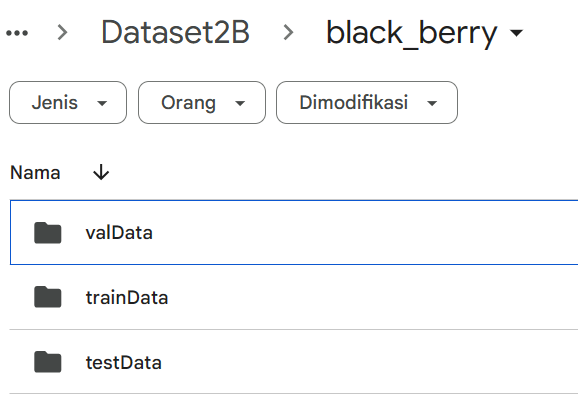

### Bitter gourd datasets

In [ ]:
# code di run untuk folder bitter gourd
print(f"Jumlah total file dalam dataset black_berry: {num_total_files}")
print(f"Jumlah file untuk training set: {num_train_files}")
print(f"Jumlah file untuk validation set: {num_val_files}")
print(f"Jumlah file untuk test set: {num_test_files}")


Jumlah total file dalam dataset black_berry: 400
Jumlah file untuk training set: 320
Jumlah file untuk validation set: 40
Jumlah file untuk test set: 40


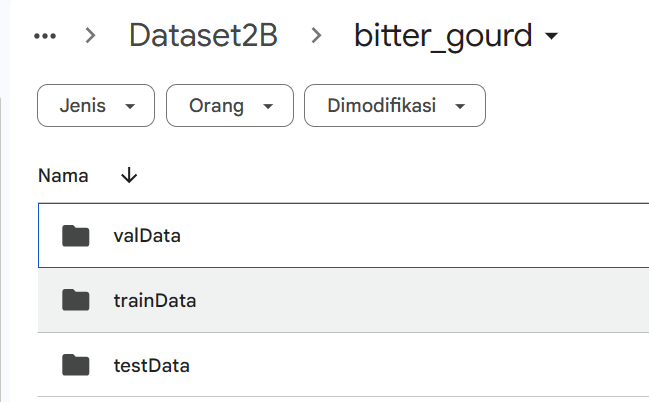

### Betel nut datasets

In [ ]:
# code di run untuk folder betel nut
print(f"Jumlah total file dalam dataset black_berry: {num_total_files}")
print(f"Jumlah file untuk training set: {num_train_files}")
print(f"Jumlah file untuk validation set: {num_val_files}")
print(f"Jumlah file untuk test set: {num_test_files}")


Jumlah total file dalam dataset black_berry: 400
Jumlah file untuk training set: 320
Jumlah file untuk validation set: 40
Jumlah file untuk test set: 40


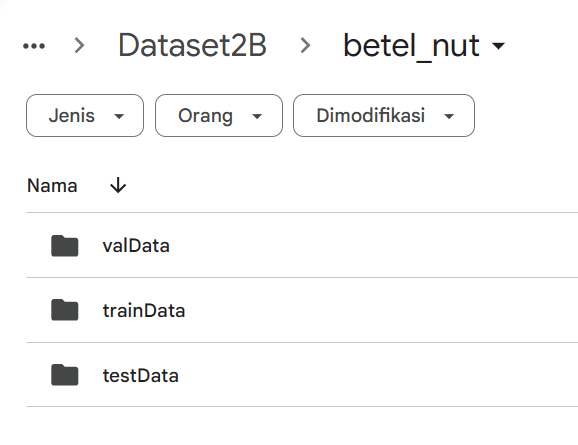

### Banana datasets

In [ ]:
# code di run untuk folder banana
print(f"Jumlah total file dalam dataset black_berry: {num_total_files}")
print(f"Jumlah file untuk training set: {num_train_files}")
print(f"Jumlah file untuk validation set: {num_val_files}")
print(f"Jumlah file untuk test set: {num_test_files}")


Jumlah total file dalam dataset black_berry: 400
Jumlah file untuk training set: 320
Jumlah file untuk validation set: 40
Jumlah file untuk test set: 40


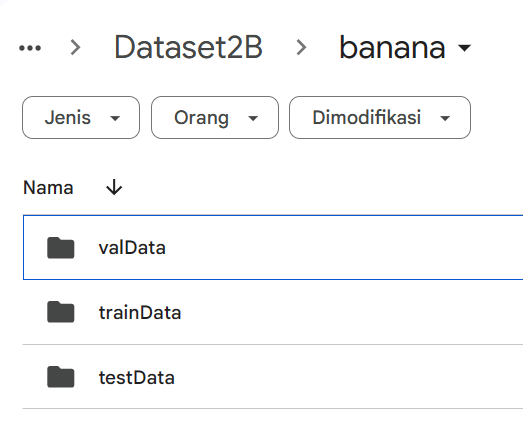

### Folder masing-masing makanan dipindahkan menurut ke folder train, test, dan val

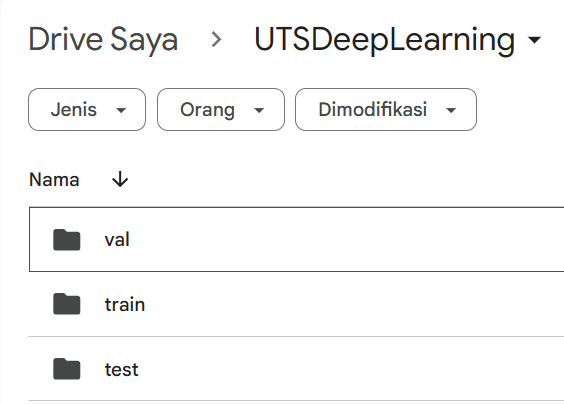

Di dalam folder val, train, dan test, akan ada masing-masing makanan

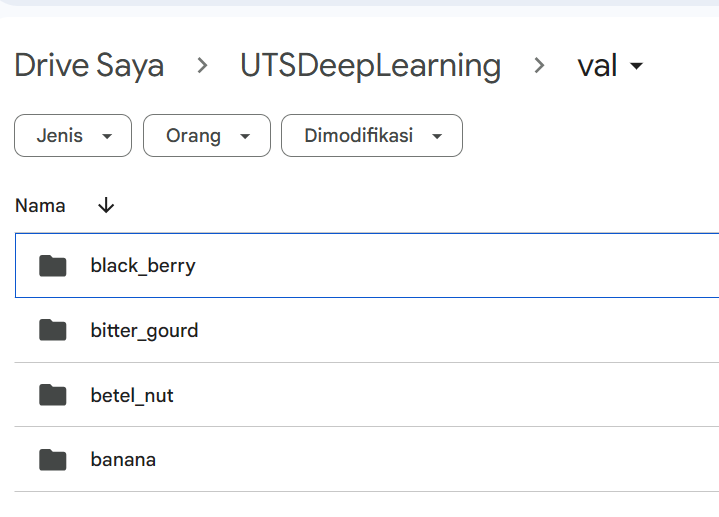

## Dan kemudian lakukan resize resolusi gambar menjadi 224 x 224.

In [28]:
data_transform = transforms.Compose([
        transforms.Resize((224,224)), # dimensi nya 224 x 224
        transforms.ToTensor(), # ubah ke tensor
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # proses normalisasi untuk gambar
    ]) # jadi imageny yang punya intensitas macem-macem, di normalisasi ke array yang rangenya sama
    # untuk RESNET, perlu di normalisasi

### Load data

In [29]:
# Load datanya
train_dataset = ImageFolder("/content/drive/My Drive/UTSDeepLearning/train",transform=data_transform)
test_dataset = ImageFolder("/content/drive/My Drive/UTSDeepLearning/test",transform=data_transform)
val_dataset = ImageFolder("/content/drive/My Drive/UTSDeepLearning/val",transform=data_transform)

In [20]:
# Mengecek ukuran tiap dataset
print(len(train_dataset))
print(len(test_dataset))
print(len(val_dataset))

1280
160
160


In [35]:
# Buat data loader untuk setiap set (training, validation, test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

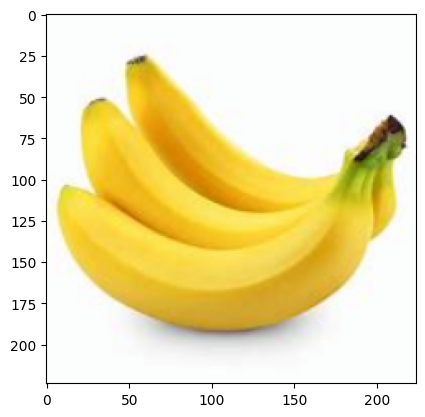

In [34]:
# Print data pertama
def imshow(inp,cmap=None): # untuk menunjukkan sample data (bukan bagian dari proses training)
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp,cmap)

imshow(train_dataset[1][0])

##  Lakukan eksplorasi terhadap data tersebut dengan melihat histogram warnanya

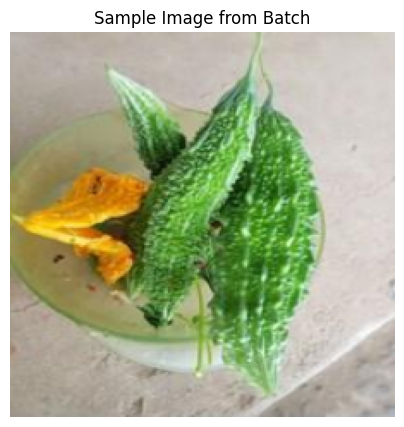

In [ ]:
# Memunculkan data dari data training

import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch gambar dari train_loader
sample_batch = next(iter(train_loader))

# Fungsi untuk menampilkan gambar dari satu batch
def show_image_from_batch(batch_images):
    # Ambil gambar pertama dari batch
    image = batch_images[0].numpy()  # Konversi tensor PyTorch ke array numpy
    # Lakukan plotting gambar
    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(image, (1, 2, 0)))  # Transpose dimensi untuk matplotlib
    plt.axis('off')  # Hilangkan sumbu
    plt.title('Sample Image from Batch')
    plt.show()

# Tampilkan gambar dari batch pertama dalam train_loader
show_image_from_batch(sample_batch[0])


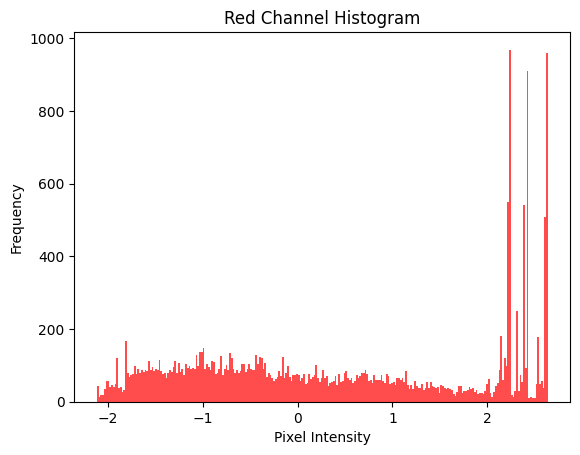

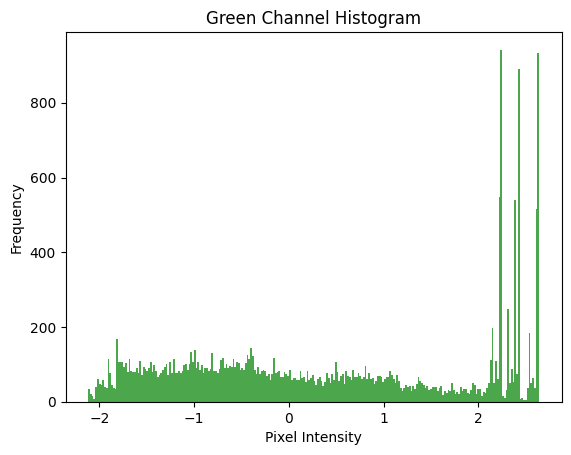

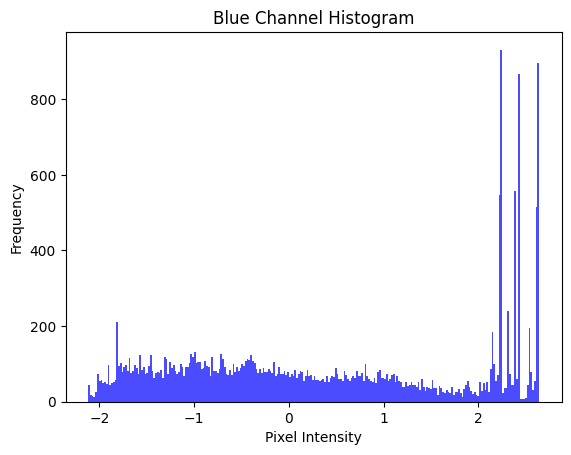

In [ ]:
import matplotlib.pyplot as plt
import torch

# Fungsi untuk menampilkan histogram warna dari batch gambar
def plot_color_histogram(batch_images):
    colors = ['red', 'green', 'blue']
    for i in range(3):  # Loop untuk masing-masing saluran warna (R, G, B)
        plt.hist(batch_images[:, :, :, i].ravel(), bins=256, color=colors[i], alpha=0.7)
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'{colors[i].capitalize()} Channel Histogram')
        plt.show()

# Contoh penggunaan fungsi untuk menampilkan histogram warna dari satu batch gambar dalam data loader
sample_batch = next(iter(train_loader))  # Mengambil satu batch gambar dari data pelatihan
plot_color_histogram(sample_batch[0])  # Gunakan indeks 0 untuk mendapatkan tensor gambar dari batch


Berdasarkan 3 grafik diatas, gambar pada index 0 memiliki komposisi warna yang lebih dominan terhadap warna hijau dan merah


1. **Red Channel Histogram:** Gambar didominasidengan sedikit warna merah cerah. Distribusi histogram miring ke kiri menunjukkan lebih banyak piksel dengan intensitas merah rendah, dengan beberapa piksel memiliki intensitas yang sangat tinggi.

2. **Green Channel Histogram:** Pola histogram serupa dengan saluran merah, menandakan dominasi dengan variasi warna hijau cerah. Distribusi histogram yang miring ke kiri mengindikasikan lebih banyak piksel dengan intensitas hijau rendah, dengan beberapa piksel memiliki intensitas yang sangat tinggi.

3. **Blue Channel Histogram:** Intensitas warna biru cenderung rendah, tetapi lebih tinggi dibandingkan dengan merah dan hijau. Distribusi histogram menunjukkan dominasi warna biru tua dengan sedikit variasi warna biru cerah.



# **Soal B**

Identifikasikan tantangan dan kesulitan dari data image yang diberikan. Hal ini
terkait dengan Image Quality (Resolution, Noise) dan Image Variability (Lighting Conditions,
Perspective and Angle, Occlusions, Background Variability, Scale Variations). Berikan contohnya.

Contoh gambar dari training set:


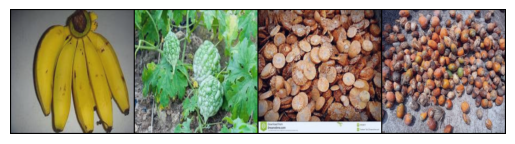


Contoh gambar dari validation set:


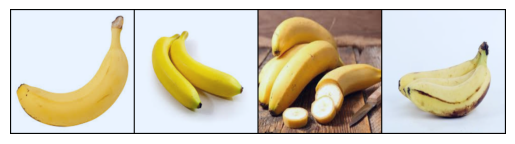


Contoh gambar dari test set:


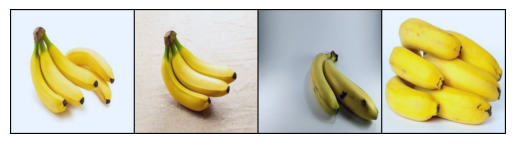

In [ ]:
import torchvision.utils as vutils

# Fungsi untuk menampilkan contoh gambar dari data loader
def show_sample_images(loader):
    sample_batch = next(iter(loader))  # Mengambil satu batch gambar dari data loader
    grid_img = vutils.make_grid(sample_batch[0][:4], nrow=4, padding=2, normalize=True)  # Ambil 4 gambar pertama
    plt.imshow(grid_img.permute(1, 2, 0))  # Ubah dimensi tensor untuk tampilan gambar
    plt.axis('off')
    plt.show()

# Tampilkan contoh gambar dari setiap set (training, validation, test)
print("Contoh gambar dari training set:")
show_sample_images(train_loader)

print("\nContoh gambar dari validation set:")
show_sample_images(val_loader)

print("\nContoh gambar dari test set:")
show_sample_images(test_loader)


Dari contoh gambar-gambar diatas, tantangan dan kesulitan yang saya alami ialah:

**Kualitas Gambar (Image Quality)**

* **Resolusi:** Gambar memiliki resolusi yang relatif rendah, yaitu sekitar 224x224 piksel.

**Variabilitas Gambar (Image Variability)**

* **Lighting Conditions:** Gambar memiliki kondisi pencahayaan yang bervariasi, dengan beberapa gambar lebih terang dan beberapa gambar lebih gelap. Contoh: Gambar pisang ada yang pencahayaan rendah, dan ada yang tinggi

* **Perspective and Angle:** Gambar memiliki sudut pandang dan perspektif yang bervariasi. Contoh: Gambar pisang ada yang dari samping dan dari atas

* **Background Variability:** Gambar memiliki latar belakang yang bervariasi, dengan beberapa gambar memiliki latar belakang yang kompleks dan beberapa gambar memiliki latar belakang yang sederhana. Contoh: Gambar pisang ada yang memiliki background putih, ada yang ditaruh diatas kayu

* **Scale Variations:** Gambar memiliki variasi skala, dengan beberapa objek dalam gambar lebih besar dan beberapa objek lebih kecil.
Contoh:
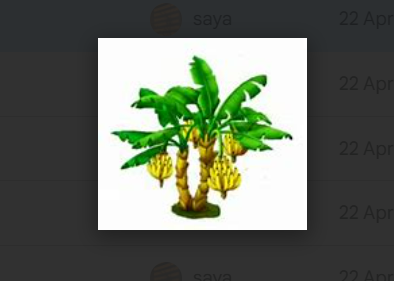

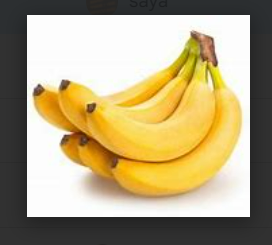




**Contoh Tantangan dan Kesulitan yang dapat dialami**

1. Model mungkin kesulitan untuk mengenali objek dalam gambar yang memiliki resolusi rendah.
2. Model mungkin kesulitan untuk mengenali objek dalam gambar yang memiliki kondisi pencahayaan yang berbeda.
3. Model mungkin kesulitan untuk mengenali objek dalam gambar yang diambil dari sudut pandang yang berbeda.
4. Model mungkin kesulitan untuk fokus pada objek utama dalam gambar yang memiliki latar belakang yang kompleks.
5. Model mungkin kesulitan untuk mengenali objek dengan ukuran yang berbeda.

# **Soal C**
Buatlah arsitektur baseline sesuai dengan gambar arsitektur VGG-16 berikut ini:
(Catatan: Activation function tiap hidden layer menggunakan ReLU). Jelaskan mengenai model pretained dari VGG-16 yang digunakan dan metode fine-tuning yang dilakukan

![VGG Architecture.png](<attachment:VGG Architecture.png>)
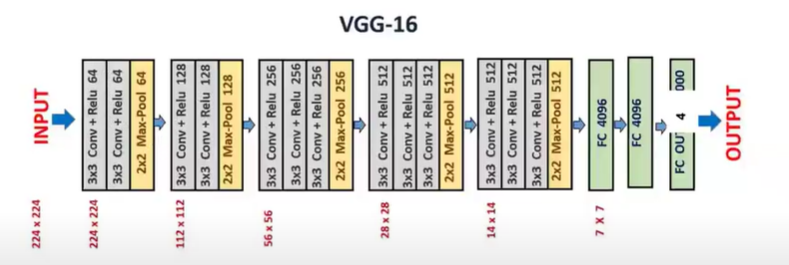

In [ ]:
# Ambil contoh batch pertama dari data loader
sample_batch = next(iter(train_loader))  # Mengambil satu batch gambar dari data pelatihan

# Cetak label dari contoh batch pertama
labels = sample_batch[1]  # Ambil label dari batch
num_classes = len(torch.unique(labels))  # Hitung jumlah kelas dengan menghitung nilai unik pada label
print("Jumlah Kelas:", num_classes)


Jumlah Kelas: 4


## Model Baseline (using pytorch)

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from sklearn.metrics import accuracy_score

# Inisiasi device (CPU atau GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Definisi model BaselineVGG16 dengan penambahan Batch Normalization
class BaselineVGG16(nn.Module):
    def __init__(self, num_classes=4):  # Sesuaikan dengan jumlah kelas Anda
        super(BaselineVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            # 3 --> channel size (RGB)
            # 64 --> jumlah kernel dimana kernelnya sizenya 3, padding 1 (same padding)
            # Output dari layer ini adalah 64 feature maps berukuran 224x224

            nn.BatchNorm2d(64), # Batch Normalization
            nn.ReLU(inplace=True), # Activation Function

            # Layer Convolutional Kedua
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            # Input 64 feature maps dari layer sebelumnya
            # Output 64 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Max Pooling dengan kernel 2x2 dan stride 2
            # Mengurangi ukuran gambar menjadi setengah dari sebelumnya (112x112)

            # Layer Convolutional Ketiga
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            # Input 64 feature maps
            # Output 128 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            # Layer Convolutional Keempat
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            # Input 128 feature maps
            # Output 128 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),
            # Max Pooling
            # Mengurangi ukuran gambar menjadi setengah dari sebelumnya (56x56)

            # Layer Convolutional Kelima
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            # Input 128 feature maps
            # Output 256 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            # Layer Convolutional Keenam
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            # Input 256 feature maps
            # Output 256 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            # Layer Convolutional Ketujuh
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            # Input 256 feature maps
            # Output 256 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),
            # Max Pooling
            # Mengurangi ukuran gambar menjadi setengah dari sebelumnya (28x28)

            # Layer Convolutional Kedelapan
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            # Input 256 feature maps
            # Output 512 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            # Layer Convolutional Kesembilan
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # Input 512 feature maps
            # Output 512 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            # Layer Convolutional Kesepuluh
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # Input 512 feature maps
            # Output 512 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),
            # Max Pooling
            # Mengurangi ukuran gambar menjadi setengah dari sebelumnya (14x14)

            # Layer Convolutional Kesebelas
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # Input 512 feature maps
            # Output 512 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            # Layer Convolutional Keduabelas
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # Input 512 feature maps
            # Output 512 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            # Layer Convolutional Ketiga Belas
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            # Input 512 feature maps
            # Output 512 feature maps dengan ukuran yang sama

            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),

            nn.MaxPool2d(kernel_size=2, stride=2),
            # Max Pooling
            # Mengurangi ukuran gambar menjadi setengah dari sebelumnya (7x7)

        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        # menggunakan Adaptive Average Pooling untuk menghasilkan output dengan ukuran yang ditentukan (7x7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            # 512 x 7 x 7 (hasil dari avgpool) dan output 4096.
            nn.ReLU(inplace=True),
            nn.Linear(4096, 4096),
            # input 4096 dan output 4096.
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
            # input 4096 dan output sesuai dengan num_classes
        )


    #Define the PROCESS using the architecture that has been defined
    def forward(self, x):
        # Input: x (batch_size, 3, 224, 224)
        # Convolutional Layers

        x = self.features(x)
        # Output shape after convolution layers: (batch_size, 512, 7, 7)

        x = self.avgpool(x)
        # Output shape after adaptive average pooling: (batch_size, 512, 7, 7)

        x = torch.flatten(x, 1)
        # Flatten the output: (batch_size, 512 * 7 * 7)
        # Fully Connected Layers

        x = self.classifier(x)
        # Output shape after classifier: (batch_size, num_classes)
        return x

# Inisiasi model dengan jumlah kelas yang sesuai
num_classes = 4  # Sesuaikan dengan jumlah kelas Anda
model = BaselineVGG16(num_classes=num_classes)
print(model)


BaselineVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2

Model diatas merupakan  sebuah arsitektur baseline yang terinspirasi oleh arsitektur VGG-16. (Bukan versi pre-trained, karena disesuaikan dengan gambar)

Berikut adalah penjelasan mengenai model yang didefinisikan dalam kode tersebut:

1. **Konvolusi**: Model menggunakan beberapa lapisan konvolusi dengan kernel size 3x3 dan padding 1 untuk mempertahankan ukuran gambar setelah konvolusi. Setiap lapisan konvolusi diikuti oleh fungsi aktivasi ReLU untuk memperkenalkan non-linearitas.

2. **MaxPooling**: Setiap lapisan konvolusi diikuti oleh lapisan MaxPooling dengan kernel size 2x2 dan stride 2 untuk mengurangi dimensi spatikal dari feature map.

3. **Fully Connected (FC)**: Setelah lapisan konvolusi, ada beberapa lapisan fully connected untuk klasifikasi. Terdapat tiga lapisan FC: fc1 dengan 4096 unit, fc2 dengan 4096 unit, dan fc3 dengan output sesuai dengan jumlah kelas yang diinginkan (dalam contoh kode tersebut, num_classes=4).

4. **Fungsi Aktivasi**: Fungsi aktivasi yang digunakan adalah ReLU untuk semua lapisan konvolusi dan fully connected, kecuali untuk lapisan output yang menggunakan fungsi aktivasi softmax untuk menghasilkan distribusi probabilitas kelas.

Metode fine-tuning yang dapat dilakukan pada model ini adalah dengan:
- Mengganti learning rate
- Menambah dropout

### **Evaluasi**
- Optimizer SGD
- Learning rate = 0.01
- Epoch = 20
- Batch_size = 32

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from sklearn.metrics import accuracy_score

# Tentukan device (CPU atau GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Tentukan batch size dan data loader untuk setiap set
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Inisiasi model
num_classes = 4
model = BaselineVGG16(num_classes=num_classes).to(device)

# Definisi loss function dan optimizer SGD
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Fungsi pelatihan model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')
        # Evaluasi pada data validasi setiap epoch
        val_accuracy = evaluate_model(model, val_loader)
        print(f'Validation Accuracy: {val_accuracy}')

# Fungsi evaluasi model
def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

# Pelatihan model
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20)

# Evaluasi model pada data test
test_accuracy = evaluate_model(model, test_loader)
print(f'Accuracy on test set: {test_accuracy}')


Epoch 1, Loss: 0.8776205219328403
Validation Accuracy: 0.66875
Epoch 2, Loss: nan
Validation Accuracy: 0.25
Epoch 3, Loss: nan
Validation Accuracy: 0.25
Epoch 4, Loss: nan
Validation Accuracy: 0.25
Epoch 5, Loss: nan
Validation Accuracy: 0.25
Epoch 6, Loss: nan
Validation Accuracy: 0.25
Epoch 7, Loss: nan
Validation Accuracy: 0.25
Epoch 8, Loss: nan
Validation Accuracy: 0.25
Epoch 9, Loss: nan
Validation Accuracy: 0.25
Epoch 10, Loss: nan
Validation Accuracy: 0.25
Epoch 11, Loss: nan
Validation Accuracy: 0.25
Epoch 12, Loss: nan
Validation Accuracy: 0.25
Epoch 13, Loss: nan
Validation Accuracy: 0.25
Epoch 14, Loss: nan
Validation Accuracy: 0.25
Epoch 15, Loss: nan
Validation Accuracy: 0.25
Epoch 16, Loss: nan
Validation Accuracy: 0.25
Epoch 17, Loss: nan
Validation Accuracy: 0.25
Epoch 18, Loss: nan
Validation Accuracy: 0.25
Epoch 19, Loss: nan
Validation Accuracy: 0.25
Epoch 20, Loss: nan
Validation Accuracy: 0.25
Accuracy on test set: 0.25


Berdasarkan hasil diatas, dapat dilihat bahwa akurasi dalam data testing adalah sebesar 25%

# **Soal D**
Modifikasi arsitektur VGG-16 di atas agar mendapatkan hasil klasifikasi yang
optimal. Kalian dapat menambahkan atau mengurangi arsitektur tersebutdan melakukan
mengubah arsitektur pada nomor 2c dengan menggunakan dropout, batch normalization dan
lain-lainnya. Dan selanjutnya lakukan proses tuning hyperparameter agar akurasi klasifikasinya
meningkat. Berikan alasan mengapa modifikasi arsitektur dan metode tuning hyperparameter
kalian lebih baik terkait dengan tantangan dan dan kesulitan yang dihadapi dalam data image
tersebut (1b).

Pada tahap ini, saya melakukan modifikasi yaitu dengan menambah dropout dan menurunkan nilai learning rate, karena

1. **Menambah Dropout**: Mengurangi overfitting dengan mematikan sebagian unit secara acak selama pelatihan, mendorong model untuk lebih generalisasi.

2. **Penurunan Learning Rate**: Membantu mengatasi konvergensi yang lambat atau terjebak di minimum lokal. Bisa terjadi jika kita menghadapi data gambar yang kompleks, sehinggga optimisasi model menjadi lebih sulit karena risiko konvergensi yang lambat atau bahkan terjebak di minimum lokal.

### Menambah dropout 0.4 dan mengubah learning rate dari 0.01 --> 0.001

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from sklearn.metrics import accuracy_score

# Inisiasi device (CPU atau GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Definisi model BaselineVGG16 dengan penambahan Batch Normalization
class BaselineVGG16(nn.Module):
    def __init__(self, num_classes=4):  # Sesuaikan dengan jumlah kelas Anda
        super(BaselineVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4), # menambah dropout
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),# menambah dropout
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Inisiasi model dengan jumlah kelas yang sesuai
num_classes = 4  # Sesuaikan dengan jumlah kelas Anda
model = BaselineVGG16(num_classes=num_classes)
print(model)


BaselineVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from sklearn.metrics import accuracy_score

# Tentukan device (CPU atau GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Tentukan batch size dan data loader untuk setiap set
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Inisiasi model
num_classes = 4
model = BaselineVGG16(num_classes=num_classes).to(device)

# Definisi loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Fungsi pelatihan model
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')
        # Evaluasi pada data validasi setiap epoch
        val_accuracy = evaluate_model(model, val_loader)
        print(f'Validation Accuracy: {val_accuracy}')

# Fungsi evaluasi model
def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

# Pelatihan model
train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs=20)

# Evaluasi model pada data test
test_accuracy = evaluate_model(model, test_loader)
print(f'Accuracy on test set: {test_accuracy}')


Epoch 1, Loss: 1.3350693434476852
Validation Accuracy: 0.45
Epoch 2, Loss: 1.0372836410999298
Validation Accuracy: 0.825
Epoch 3, Loss: 0.692311180382967
Validation Accuracy: 0.86875
Epoch 4, Loss: 0.6122743800282479
Validation Accuracy: 0.75625
Epoch 5, Loss: 0.541522889956832
Validation Accuracy: 0.88125
Epoch 6, Loss: 0.4929192945361137
Validation Accuracy: 0.8625
Epoch 7, Loss: 0.44530381001532077
Validation Accuracy: 0.75
Epoch 8, Loss: 0.44667915888130666
Validation Accuracy: 0.9
Epoch 9, Loss: 0.4110420126467943
Validation Accuracy: 0.89375
Epoch 10, Loss: 0.33356853686273097
Validation Accuracy: 0.9
Epoch 11, Loss: 0.30218484476208685
Validation Accuracy: 0.8875
Epoch 12, Loss: 0.29248879179358483
Validation Accuracy: 0.8875
Epoch 13, Loss: 0.7285477839410305
Validation Accuracy: 0.8875
Epoch 14, Loss: 0.3134420203045011
Validation Accuracy: 0.9
Epoch 15, Loss: 0.24960218174383045
Validation Accuracy: 0.875
Epoch 16, Loss: 0.19500029059126972
Validation Accuracy: 0.8875
Epoch 1

Dapat dilihat dari sini, dengan menambah dropout 0,4 dan mengubah learning rate. Nilai akurasi pada test set naik ke 0.8 atau 80%. Dan akurasi di validasi sekitar 86% - 87%

### Menambah dropout 0.8 dan mengubah learning rate dari 0.01 --> 0.001

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from sklearn.metrics import accuracy_score

# Inisiasi device (CPU atau GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Definisi model BaselineVGG16 dengan penambahan Batch Normalization
class BaselineVGG16(nn.Module):
    def __init__(self, num_classes=4):  # Sesuaikan dengan jumlah kelas Anda
        super(BaselineVGG16, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((7, 7))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.8), # menambah dropout 0.8
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.8), # menambah dropout 0.8
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# Inisiasi model dengan jumlah kelas yang sesuai
num_classes = 4  # Sesuaikan dengan jumlah kelas Anda
model1 = BaselineVGG16(num_classes=num_classes)
print(model1)


BaselineVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import CIFAR10
from sklearn.metrics import accuracy_score

# Tentukan device (CPU atau GPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Tentukan batch size dan data loader untuk setiap set
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Inisiasi model
num_classes = 4
model1 = BaselineVGG16(num_classes=num_classes).to(device)

# Definisi loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001)

# Fungsi pelatihan model
def train_model(model1, criterion, optimizer, train_loader, val_loader, num_epochs=10):
    model1.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model1(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader)}')
        # Evaluasi pada data validasi setiap epoch
        val_accuracy = evaluate_model(model1, val_loader)
        print(f'Validation Accuracy: {val_accuracy}')

# Fungsi evaluasi model
def evaluate_model(model1, data_loader):
    model1.eval()
    all_predictions = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model1(inputs)
            _, predicted = torch.max(outputs, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_predictions)
    return accuracy

# Pelatihan model
train_model(model1, criterion, optimizer, train_loader, val_loader, num_epochs=20)

# Evaluasi model pada data test
test_accuracy = evaluate_model(model1, test_loader)
print(f'Accuracy on test set: {test_accuracy}')


Epoch 1, Loss: 1.4325534462928773
Validation Accuracy: 0.3375
Epoch 2, Loss: 1.0940705969929696
Validation Accuracy: 0.8
Epoch 3, Loss: 0.7443453431129455
Validation Accuracy: 0.8375
Epoch 4, Loss: 0.6127529360353947
Validation Accuracy: 0.8375
Epoch 5, Loss: 0.5229401715099812
Validation Accuracy: 0.85625
Epoch 6, Loss: 0.5370257839560508
Validation Accuracy: 0.79375
Epoch 7, Loss: 0.48971296064555647
Validation Accuracy: 0.88125
Epoch 8, Loss: 0.42562944144010545
Validation Accuracy: 0.8625
Epoch 9, Loss: 0.3801975302398205
Validation Accuracy: 0.89375
Epoch 10, Loss: 0.372346680611372
Validation Accuracy: 0.89375
Epoch 11, Loss: 0.5016829455271363
Validation Accuracy: 0.83125
Epoch 12, Loss: 0.417420993372798
Validation Accuracy: 0.875
Epoch 13, Loss: 0.3079906078055501
Validation Accuracy: 0.875
Epoch 14, Loss: 0.2650487687438726
Validation Accuracy: 0.9
Epoch 15, Loss: 0.24517377018928527
Validation Accuracy: 0.8875
Epoch 16, Loss: 0.33452799655497073
Validation Accuracy: 0.9
Epoc

Dapat dilihat dari sini, dengan menambah dropout 0,8 dan mengubah learning rate. Nilai akurasi pada test set naik ke 0.8 atau 80%. Dan akurasi di validasi sebesar 83%

### **Kesimpulan**
Jika dilihat dari akurasi data di data testing, kedua model memiliki akurasi yang sama yaitu 0.8 atau 80%, namun model yang menggunakan dropout 0,4 memiliki akurasi yang lebih tinggi (86-87%) pada data validasi dibanding model yang menggunakan dropout 0.8 (83%)

# **Soal E**
Evaluasi performa dari arsitektur nomor 2d dan jelaskan hasil yang kalian
dapatkan. Gunakan testing set yang diberikan untuk memprediksi nilai ground truth dengan
predicted result.

In [55]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Menghitung prediksi menggunakan model pada data testing set
model.eval()
all_predictions = []
all_labels = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Evaluasi performa model
accuracy = accuracy_score(all_labels, all_predictions)
classification_rep = classification_report(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Menampilkan hasil evaluasi performa
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{classification_rep}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.42      0.60        40
           1       0.76      0.93      0.83        40
           2       0.67      0.90      0.77        40
           3       0.95      0.95      0.95        40

    accuracy                           0.80       160
   macro avg       0.84      0.80      0.79       160
weighted avg       0.84      0.80      0.79       160

Confusion Matrix:
[[17  9 14  0]
 [ 0 37  3  0]
 [ 0  2 36  2]
 [ 0  1  1 38]]


Penjelasan:

1. **Class 0: Banana**:
   - Precision: 1.00 (tinggi)
   - Recall: 0.42 (rendah)
   - Interpretasi:
     - Precision yang tinggi menunjukkan bahwa ketika model memprediksi kelas 0, itu benar-benar benar sebagian besar waktu. Artinya, dari semua prediksi yang dibuat untuk kelas 0, sebagian besar adalah benar.
     - Namun, recall yang rendah menunjukkan bahwa model gagal mendeteksi sebagian besar data sebenarnya yang masuk ke dalam kelas 0. Hal ini menunjukkan bahwa ada banyak kasus di mana model tidak mampu mengidentifikasi dengan benar data kelas 0 yang sebenarnya.

2. **Class 1: Betel_nut**:
   - Precision: 0.76 (baik)
   - Recall: 0.93 (tinggi)
   - Interpretasi:
     - Precision yang baik menunjukkan bahwa ketika model memprediksi kelas 1, itu cenderung benar sebagian besar waktu. Model jarang membuat prediksi yang salah untuk kelas 1.
     - Recall yang tinggi menunjukkan bahwa model secara efektif dapat mendeteksi sebagian besar data sebenarnya yang masuk ke dalam kelas 1. Dari semua data yang sebenarnya kelas 1, sebagian besar dapat diidentifikasi dengan benar oleh model.

3. **Class 2: Bitter_gourd**:
   - Precision: 0.67 (sedikit lebih rendah)
   - Recall: 0.90 (tinggi)
   - Interpretasi:
     - Precision yang sedikit lebih rendah menunjukkan bahwa model cenderung membuat beberapa false positive (mengklasifikasikan data yang sebenarnya bukan kelas 2 sebagai kelas 2).
     - Namun, recall yang tinggi menunjukkan bahwa model dapat mendeteksi sebagian besar data sebenarnya yang masuk ke dalam kelas 2. Meskipun ada beberapa false positive, sebagian besar data kelas 2 dapat diidentifikasi dengan benar oleh model.

4. **Class 3: Black_berry**:
   - Precision: 0.95 (tinggi)
   - Recall: 0.95 (tinggi)
   - Interpretasi:
     - Precision dan recall yang tinggi menunjukkan bahwa model memiliki kinerja yang sangat baik dalam memprediksi dan mendeteksi data kelas 3. Model jarang membuat kesalahan baik dalam membuat prediksi kelas 3 maupun dalam mendeteksi data sebenarnya kelas 3.

Dari analisis di atas, dapat disimpulkan bahwa model memiliki kinerja yang baik secara umum, namun terdapat beberapa area yang dapat ditingkatkan yaitu untuk kelas 0 dan kelas 2